**Algoritmo de Agrupamento Kmeans**

**Código baseado em:**

1) https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset

2) https://realpython.com/k-means-clustering-python/

In [380]:
# import pandas as pd
# import numpy as np

# # Generate some example data
# data = {
#     'value': np.random.randn(100)  # Example numerical data
# }
# df = pd.DataFrame(data)

# # Calculate quartiles
# Q1 = df['value'].quantile(0.25)
# Q3 = df['value'].quantile(0.75)

# # Calculate IQR
# IQR = Q3 - Q1

# # Define outlier boundaries
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
# df_filtered = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

# # df_filtered now contains rows without outliers


In [381]:
#%pip install plotly --upgrade
#%pip install kneed 
#%pip install pandas
#%pip install seaborn
#%pip install scikit-learn
#%pip install imbalanced-learn
# # To install only knee-detection algorithm

In [382]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
from kneed import DataGenerator, KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.preprocessing import StandardScaler #Função utilizada para normalização dos dados
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados

In [383]:
import pandas as pd
base= pd.read_csv('Iris.csv', sep=',',encoding='cp1252')
base = base.drop_duplicates()
base = base.reset_index()
base = base.drop('index',axis=1)
base

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


In [384]:
base['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [385]:
le = LabelEncoder()
oe = OneHotEncoder(sparse_output=False)
encoded = oe.fit_transform(base[['class']])
encoded_df = pd.DataFrame(encoded, columns=oe.get_feature_names_out(['class']))
base['class'] = le.fit_transform(base['class'])
base = pd.concat([base,encoded_df],axis=1)
base

,sepallength,sepalwidth,petallength,petalwidth,class,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,0,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,0,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,0,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,0,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,2,0.0,0.0,1.0
143,6.3,2.5,5.0,1.9,2,0.0,0.0,1.0
144,6.5,3.0,5.2,2.0,2,0.0,0.0,1.0
145,6.2,3.4,5.4,2.3,2,0.0,0.0,1.0


In [386]:
mask = base['class'] == 0
mask2 = base['class'] == 2
mask3 = base['class'] == 1
seto = base[mask]
virg = base[mask2]
vers = base[mask3]

In [387]:

for i in seto.columns:
# # Calculate quartiles
    Q1 = seto[i].quantile(0.25)
    Q3 = seto[i].quantile(0.75)

# # Calculate IQR
    IQR = Q3 - Q1

# # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
    seto = seto[(seto[i] >= lower_bound) & (seto[i] <= upper_bound)]

# # df_filtered now contains rows without outliers
seto

,sepallength,sepalwidth,petallength,petalwidth,class,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,0,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,0,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,0,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,0,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,0,1.0,0.0,0.0
5,5.4,3.9,1.7,0.4,0,1.0,0.0,0.0
6,4.6,3.4,1.4,0.3,0,1.0,0.0,0.0
7,5.0,3.4,1.5,0.2,0,1.0,0.0,0.0
8,4.4,2.9,1.4,0.2,0,1.0,0.0,0.0
9,4.9,3.1,1.5,0.1,0,1.0,0.0,0.0


In [388]:

for i in vers.columns:
# # Calculate quartiles
    Q1 = vers[i].quantile(0.25)
    Q3 = vers[i].quantile(0.75)

# # Calculate IQR
    IQR = Q3 - Q1

# # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
    vers = vers[(vers[i] >= lower_bound) & (vers[i] <= upper_bound)]

# # df_filtered now contains rows without outliers
vers

,sepallength,sepalwidth,petallength,petalwidth,class,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
48,7.0,3.2,4.7,1.4,1,0.0,1.0,0.0
49,6.4,3.2,4.5,1.5,1,0.0,1.0,0.0
50,6.9,3.1,4.9,1.5,1,0.0,1.0,0.0
51,5.5,2.3,4.0,1.3,1,0.0,1.0,0.0
52,6.5,2.8,4.6,1.5,1,0.0,1.0,0.0
53,5.7,2.8,4.5,1.3,1,0.0,1.0,0.0
54,6.3,3.3,4.7,1.6,1,0.0,1.0,0.0
55,4.9,2.4,3.3,1.0,1,0.0,1.0,0.0
56,6.6,2.9,4.6,1.3,1,0.0,1.0,0.0
57,5.2,2.7,3.9,1.4,1,0.0,1.0,0.0


In [389]:

for i in virg.columns:
# # Calculate quartiles
    Q1 = virg[i].quantile(0.25)
    Q3 = virg[i].quantile(0.75)

# # Calculate IQR
    IQR = Q3 - Q1

# # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
    virg = virg[(virg[i] >= lower_bound) & (virg[i] <= upper_bound)]

# # df_filtered now contains rows without outliers
virg

,sepallength,sepalwidth,petallength,petalwidth,class,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
98,6.3,3.3,6.0,2.5,2,0.0,0.0,1.0
99,5.8,2.7,5.1,1.9,2,0.0,0.0,1.0
100,7.1,3.0,5.9,2.1,2,0.0,0.0,1.0
101,6.3,2.9,5.6,1.8,2,0.0,0.0,1.0
102,6.5,3.0,5.8,2.2,2,0.0,0.0,1.0
103,7.6,3.0,6.6,2.1,2,0.0,0.0,1.0
105,7.3,2.9,6.3,1.8,2,0.0,0.0,1.0
106,6.7,2.5,5.8,1.8,2,0.0,0.0,1.0
107,7.2,3.6,6.1,2.5,2,0.0,0.0,1.0
108,6.5,3.2,5.1,2.0,2,0.0,0.0,1.0


In [390]:
base = pd.concat([seto,vers], axis=0)
base2 = pd.concat([seto,virg],axis=0)
base3 = pd.concat([vers,virg],axis=0)
base

,sepallength,sepalwidth,petallength,petalwidth,class,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,0,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,0,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,0,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,0,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
92,5.6,2.7,4.2,1.3,1,0.0,1.0,0.0
93,5.7,3.0,4.2,1.2,1,0.0,1.0,0.0
94,5.7,2.9,4.2,1.3,1,0.0,1.0,0.0
95,6.2,2.9,4.3,1.3,1,0.0,1.0,0.0


In [391]:
from imblearn.under_sampling import NearMiss
#Remover as mais parecidas entre classes
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(base.drop('class',axis=1), base['class'])
base = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['class'])], axis=1)
X_resampled, y_resampled = nm.fit_resample(base2.drop('class',axis=1), base2['class'])
base2 = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['class'])], axis=1)
X_resampled, y_resampled = nm.fit_resample(base3.drop('class',axis=1), base3['class'])
base3 = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['class'])], axis=1)
base

,sepallength,sepalwidth,petallength,petalwidth,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica,class
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0,0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0,0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0,0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0,0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
83,6.5,2.8,4.6,1.5,0.0,1.0,0.0,1
84,6.2,2.2,4.5,1.5,0.0,1.0,0.0,1
85,5.9,3.2,4.8,1.8,0.0,1.0,0.0,1
86,6.7,3.1,4.7,1.5,0.0,1.0,0.0,1


In [392]:
base = pd.concat([base,base2,base3],axis=0)
base = base.drop_duplicates()
base = base.drop('class',axis=1)
base

,sepallength,sepalwidth,petallength,petalwidth,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
1,6.0,2.7,5.1,1.6,0.0,1.0,0.0
2,6.3,2.5,4.9,1.5,0.0,1.0,0.0
4,6.7,3.0,5.0,1.7,0.0,1.0,0.0
13,6.8,2.8,4.8,1.4,0.0,1.0,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2748f85c790>,
 'caps': [<matplotlib.lines.Line2D at 0x2748f85ccd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2748f85c4f0>,
 'medians': [<matplotlib.lines.Line2D at 0x2748f85d210>,
 'fliers': [<matplotlib.lines.Line2D at 0x2748f85d4b0>,
 'means': []}

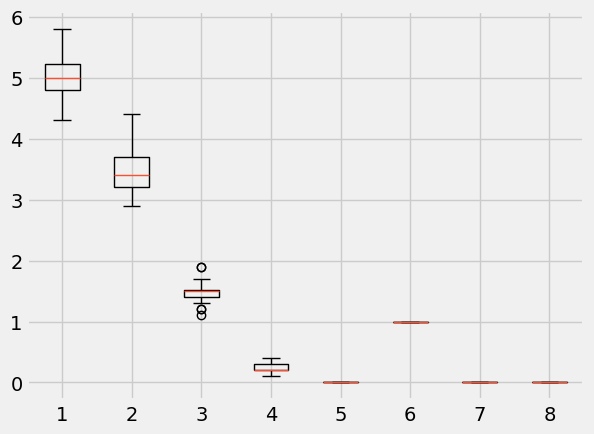

In [393]:
plt.boxplot(seto)

In [394]:
Entrada = base.iloc[:, 0:4].values
Entrada.shape

(137, 4)

In [395]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
Entrada = scaler.fit_transform(Entrada)

In [396]:
Entrada

array([[0.23529412, 0.625     , 0.05357143, 0.04166667],
       [0.17647059, 0.41666667, 0.05357143, 0.04166667],
       [0.11764706, 0.5       , 0.03571429, 0.04166667],
       [0.08823529, 0.45833333, 0.07142857, 0.04166667],
       [0.20588235, 0.66666667, 0.05357143, 0.04166667],
       [0.32352941, 0.79166667, 0.10714286, 0.125     ],
       [0.08823529, 0.58333333, 0.05357143, 0.08333333],
       [0.20588235, 0.58333333, 0.07142857, 0.04166667],
       [0.02941176, 0.375     , 0.05357143, 0.04166667],
       [0.17647059, 0.45833333, 0.07142857, 0.        ],
       [0.32352941, 0.70833333, 0.07142857, 0.04166667],
       [0.14705882, 0.58333333, 0.08928571, 0.04166667],
       [0.14705882, 0.41666667, 0.05357143, 0.        ],
       [0.        , 0.41666667, 0.        , 0.        ],
       [0.44117647, 0.83333333, 0.01785714, 0.04166667],
       [0.41176471, 1.        , 0.07142857, 0.125     ],
       [0.32352941, 0.79166667, 0.03571429, 0.125     ],
       [0.23529412, 0.625     ,

Para analisar Silhouette:
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [397]:
# Determinando a Silhouette para número máximo de cluster estimado (Raiz(instâncias/2)
limit = int((Entrada.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(Entrada)
    pred = model.predict(Entrada)
    score = silhouette_score(Entrada, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.644
Silhouette Score k = 3: 0.505
Silhouette Score k = 4: 0.451
Silhouette Score k = 5: 0.373
Silhouette Score k = 6: 0.345
Silhouette Score k = 7: 0.336
Silhouette Score k = 8: 0.436


**WCSS - Within Clusters Sum of Squares = é a soma dos quadrados dentro dos clusters**
https://rpubs.com/diascodes/770518

Veja: https://en.wikipedia.org/wiki/Elbow_method_(clustering)

In [398]:
wcss = []
for i in range(2, 11):
  #print(i)
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(Entrada)
  wcss.append(kmeans.inertia_)

**Usando o método Elbow para encontrar o número ideal de clusters**

In [399]:
wcss

[10.489645546155709,
 6.026937290546272,
 4.676082671766487,
 4.193608902920471,
 3.87141426738113,
 2.988091798464865,
 2.65639329895999,
 2.2806936265670865,
 2.006034541921907]

**Vamos analisar o ponto de inflexão dessa curva?**

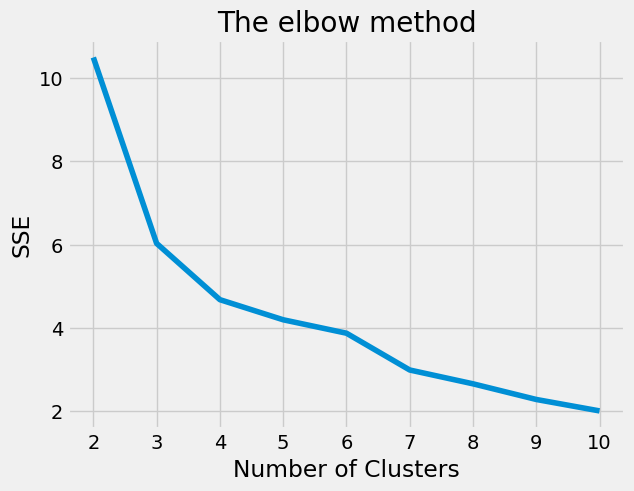

In [400]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [401]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

4

In [402]:
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=300)
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
saida_kmeans = kmeans.fit_predict(Entrada)

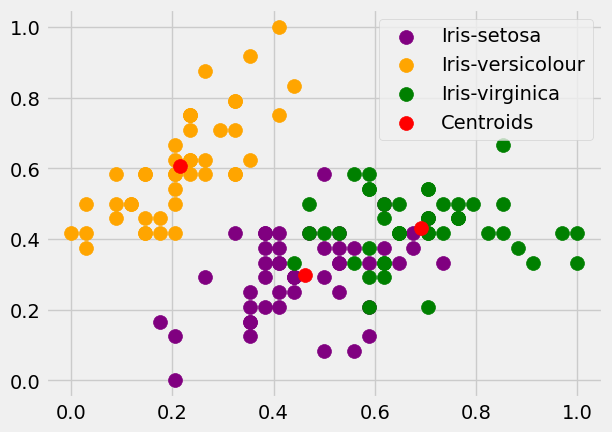

In [403]:
#Visualising the clusters
plt.scatter(Entrada[saida_kmeans == 0, 0], Entrada[saida_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(Entrada[saida_kmeans == 1, 0], Entrada[saida_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(Entrada[saida_kmeans == 2, 0], Entrada[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()